training with Ridge regression ( lambda = 0.1 )
RIDGE Epoch 0: Loss = 89.9943, weight = 0.6238, bias = 0.1807
RIDGE Epoch 100: Loss = 0.9804, weight = 2.4214, bias = 1.4658
RIDGE Epoch 200: Loss = 0.6883, weight = 2.2794, bias = 1.9828
RIDGE Epoch 300: Loss = 0.5441, weight = 2.1797, bias = 2.3462
RIDGE Epoch 400: Loss = 0.4729, weight = 2.1095, bias = 2.6015
RIDGE Epoch 500: Loss = 0.4378, weight = 2.0603, bias = 2.7809
RIDGE Epoch 600: Loss = 0.4204, weight = 2.0257, bias = 2.9069
RIDGE Epoch 700: Loss = 0.4119, weight = 2.0013, bias = 2.9955
RIDGE Epoch 800: Loss = 0.4076, weight = 1.9842, bias = 3.0577
RIDGE Epoch 900: Loss = 0.4055, weight = 1.9722, bias = 3.1015

 Training with LASSO regression (lambda = 0.1)
LASSO Epoch 0: Loss = 89.9943, weight = 0.6238, bias = 0.1807
LASSO Epoch 100: Loss = 0.6806, weight = 2.4601, bias = 1.3851
LASSO Epoch 200: Loss = 0.4489, weight = 2.3325, bias = 1.8457
LASSO Epoch 300: Loss = 0.3311, weight = 2.2416, bias = 2.1739
LASSO Epoch 400: Loss = 

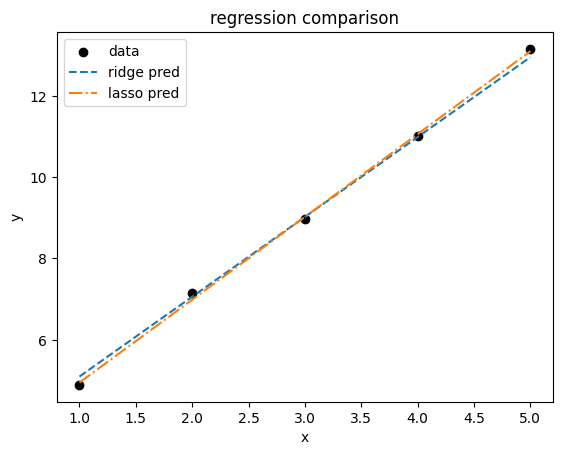

In [18]:
import numpy as np 
import matplotlib.pyplot as plt

def predict(x, w, b):
    return w * x + b

def mse_loss(y_true, y_pred):
    return np.mean((y_pred - y_true) ** 2)

def mse_with_reg(y_true, y_pred, w, lam=0.1, penalty='ridge'):
    reg = lam * (w**2) if penalty == "ridge" else lam * np.abs(w)
    return mse_loss(y_true, y_pred) + reg
    
def compute_gradients(x, y, w, b, lam = 0.1 , penalty = "ridge"):
    n = float(len(x))
    y_pred = predict(x,w,b)
    dw = (2/n) * np.sum((y_pred - y)*x)
    db = (2/n) * np.sum(y_pred - y)
    
    if penalty == "ridge":
        dw += 2*lam*w
    elif penalty == "lasso":
        dw += lam*np.sign(w)
        
    return dw, db

def train(x, y, lr = 0.01, epochs = 1000, lam = 0.1, penalty = "ridge"):
    w, b = 0.0, 0.0 # random guess
    
    for i in range(epochs):
        y_pred = predict(x, w, b)
        
        loss = mse_with_reg(y, y_pred, w, lam , penalty)
        dw , db = compute_gradients(x, y, w, b, lam, penalty)
        
        w -= lr * dw
        b -= lr * db
        
        if i %100 == 0:
            
            print(f"{penalty.upper()} Epoch {i}: Loss = {loss:.4f}, weight = {w:.4f}, bias = {b:.4f}")
        
    return w, b
    
def main():
    x = np.array([1,2,3,4,5], dtype = float)
    y = 2*x + 3 + np.random.randn(5)*0.1    ## dataset  y= 2x +3 + noise
    
    print("training with Ridge regression ( lambda = 0.1 )")
    w_ridge , b_ridge= train(x, y, lr = 0.01, epochs=1000, lam = 0.1, penalty="ridge")
    
    print("\n Training with LASSO regression (lambda = 0.1)")
    w_lasso , b_lasso = train(x, y, lr= 0.01, epochs=1000, lam = 0.1 , penalty="lasso")
    
    y_pred_ridge = predict(x, w_ridge, b_ridge)
    y_pred_lasso = predict(x, w_lasso, b_lasso)
    
    mse_ridge = mse_loss(y, y_pred_ridge)
    mse_lasso = mse_loss(y, y_pred_lasso)
    
    print("Final results \n")
    print(f"RIDGE   -> w: {w_ridge:.4f}, b: {b_ridge:.4f}, MSE: {mse_ridge:.6f}")
    print(f"LASSO   -> w: {w_lasso:.4f}, b: {b_lasso:.4f}, MSE: {mse_lasso:.6f}")
    
    ## plotting the results 
    
    plt.scatter(x, y, color = "black", label = 'data')
    plt.plot(x, y_pred_ridge, label = "ridge pred", linestyle = '--')
    plt.plot(x, y_pred_lasso, label = 'lasso pred', linestyle = '-.')
    plt.legend()
    plt.title("regression comparison")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
    
if __name__ == "__main__":
    main() 

Verify using scikit-learn

Sklearn Coeff: 1.9990487304622118 Intercept: 2.9425577488402688 MSE :  0.01065708093825205


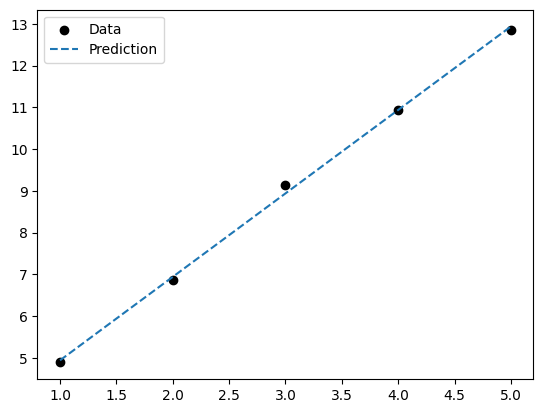

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = 2 * x.flatten() + 3 + np.random.randn(5) * 0.1

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x) 
mse = np.mean((y - y_pred) ** 2)

print("Sklearn Coeff:", model.coef_[0], "Intercept:", model.intercept_, "MSE : ", mse)

plt.scatter(x, y, color='black', label='Data')
plt.plot(x, y_pred, linestyle='--', label='Prediction')
plt.legend()
plt.show()

ElasticNet 

Now, trying to combine both L1 + L2 regression defined with parameter  0 < alpha < 1

alpha = 1 => pure LASSO

alpha = 0 => pure ridge 